# Chess game analysis, 너의 레이팅이 보여

최근에 유튜브 등을 보면서 체스에 관심이 생겨 봇까기를 많이 해왔다.
아직 대인전은 해본적 없는데, 체스닷컴에 레이팅이 존재한다고 하는데 몇 가지 궁금점이 생긴다.
- 체스닷컴 레이팅 분포는 어떻게 될까?
- 레이팅별 선호하는 오프닝이 있을까?
- 레이팅별 첫 수는 어떤것을 둘까?

그리고 체스 레이팅을 맞히는 게임도 있는데, 그걸 데이터로 풀자. 난 체스는 룰이나 기초만 알지 고수들처럼 잘 알지는 못하니까 컴퓨터에게 한번 분석을 맡겨보면 어떨지 풀어보는 것도 재미있을 것이다.

오늘은, 어려운 분석은 제쳐두고 가벼운 마음으로 EDA를 하는 그런 시간을 가져보고자 한다.
그러면서, 좀 이쁜 시각화도 해보고. 특이한 문제도 도전해보고자 한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

체스 닷컴의 약 6만건의 데이터가 담긴 Kaggle의 데이터가 있어 가지고 놀아보자

In [2]:
df = pd.read_csv('C:/Users/USER/Desktop/playground/chess_play/club_games_data.csv')

In [3]:
df.head(5)

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""..."
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c..."
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."


엥, rule은 무엇일까? 체스닷컴에는 사실 수많은 변형체스의 룰이 존재하기에, 그것을 담은 데이터로 추정된다.

In [4]:
df.rules.unique()

array(['chess', 'chess960', 'threecheck', 'crazyhouse', 'kingofthehill'],
      dtype=object)

딱 걸렸네? chess만 가져오자.

In [5]:
df_chess = df.loc[df.rules == 'chess']
print(len(df_chess))

65778


변형 체스는 거의 1000건 정도 밖에 플레이되지 않았음을 알 수 있다. 데이터가 많이 날라가진 않아, 큰 문제는 없어보인다.

## 레이팅 분포를 통한 구간 잡기

우선, 가볍게 레이팅의 분포를 살펴보자.
GM칼슨이나 GM히카루같은 챔피언급의 플레이어는 레이팅 2800~2900 정도에 분포되어 있다.
반면 가장 쉬운 체스봇은 250 정도의 수준으로 정말 누구나 룰만 알면 이길 수 있는 수준의 실력대고, 대인전의 시작 레이팅은 400으로 100 정도면 심해에 해당된다.

In [6]:
rating_list = list(df_chess['white_rating']) + list(df_chess['black_rating'])
print(len(rating_list))

131556


<AxesSubplot:ylabel='Count'>

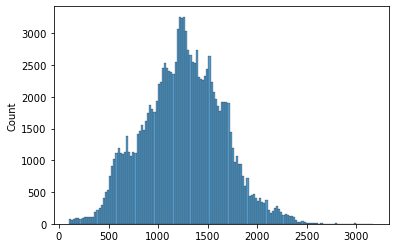

In [7]:
sns.histplot(rating_list)

대부분의 유저가, 1000~1500 사이에 분포되어 있으며, 1000 이하의 낮은 레이팅을 가진 유저도 많다. 반면, 2000 이상은 적은 편이다.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

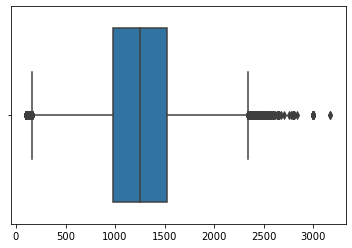

In [8]:
sns.boxplot(rating_list)

중위값은 약 1000~1500 정도이며, 상위 25%는 1500을 약간 상회하는 정도이다.
다만 이것은 전체 유저의 풀이 아닌 해당 데이터가 수집된 정도이므로 전체 유저를 대변한다고 볼 수는 없다.
다만 6만건의 데이터이므로 어느정도는 유의미하지 않을까 생각할 수 있다.

## 구간을 유의미하게 나누기

근데 솔직히 이대로 쓰기에는 좀 어렵고 유의미하게 데이터를 나누고 싶은데, 어떻게 해야할까?

* 1) 단순히 100단위로 나눈다. - 구간이 너무 넓다.
* 2) 좀 더 크게 나눈다. - 이건 너무 좁지 않은가?
* 3) 다른 어떤 요소를 활용해보자

다행히 어떤 유명한 사람이 chess의 레이팅을 맞추는 chess guess the elo에서 구간을 나눠둔 것이 있다.
이것이 어느정도 유의미한 지표가 되어줄 것이라 생각되어 여기서 나눈 기준을 따라서 분석해보려고 한다.

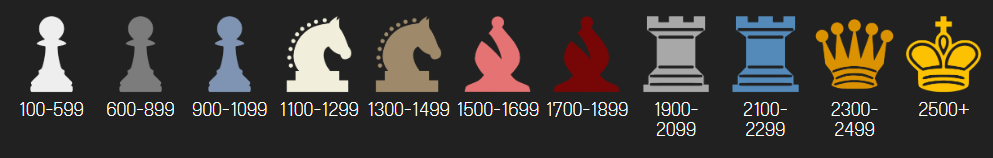

In [9]:
def get_chess_grade(x):
    if x < 100: return 0
    elif x < 600: return 1
    elif x < 900: return 2
    elif x < 1100 : return 3
    elif x < 1300 : return 4
    elif x < 1500 : return 5
    elif x < 1700 : return 6
    elif x < 1900 : return 7
    elif x < 2100 : return 8
    elif x < 2300 : return 9
    elif x < 2500 : return 10
    else: return 11

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

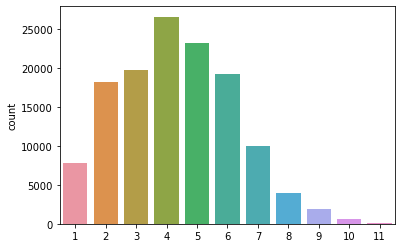

In [10]:
grade_list = [get_chess_grade(x) for x in rating_list]
sns.countplot(grade_list)

다음과 같은 등급 분포를 보이고 있다. 9등급 이상, 즉 레이팅 2100 이상의 비율이 굉장히 낮고 대부분은 900~1500 사이임을 다시 볼 수 있다.

## 필요한 정보만 가져오기

각 레이팅별로는 어려우니 등급별로 확인하는 것이 유의미할 것이다.

In [11]:
df_chess.head(5)

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""..."
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c..."
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""..."


필요한 column들을 가져오면

- white rating, black rating
- white result
- time_class, time_control (시간제한 방식)
- pgn(fen은 판의 상황만을 보여주어, 초기부터 수를 볼려면 pgn을 봐야 합니다)

In [12]:
df_chess = df_chess[['white_rating', 'black_rating', 'white_result', 'time_class', 'time_control', 'pgn']]

이제 이 자른 데이터들이 잘 정돈된 데이터인지 이상은 없는지 좀 보겠습니다.

In [13]:
df_chess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65778 entries, 0 to 66878
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   white_rating  65778 non-null  int64 
 1   black_rating  65778 non-null  int64 
 2   white_result  65778 non-null  object
 3   time_class    65778 non-null  object
 4   time_control  65778 non-null  object
 5   pgn           65778 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.5+ MB


null은 없습니다.

In [14]:
df_chess.white_result.unique()

array(['win', 'checkmated', 'timeout', 'resigned', 'abandoned',
       'timevsinsufficient', 'repetition', 'insufficient', 'stalemate',
       'agreed', '50move'], dtype=object)

뭐가 많네요? 하나씩 용어 설명을 해보죠
- win : 이겼습니다. 여러 이유로 이길 수 있는데 일단 지는 이유를 봅시다.
  - checkmated : 체크메이트를 당해서 집니다.
  - timeout : 시간패를 당했습니다. 체스는 시간이 0이 되는 순간 즉시 패배합니다.
  - resigned : 기권패입니다.
  - abandoned : 탈주입니다.
- draw : 비기는 경우가 많은데 다음과 같습니다.
  - repetition : 반복수에 의한 무승부입니다.
  - insufficient : 기물이 부족하여 무승부가 일어납니다. (예시 - 킹 vs 킹 등)
  - staleate : 스테일메이트로 무승부처리 됩니다. 체스의 특수규칙 입니다.
  - agreed : 합의 무승부입니다.
  - 50move : 폰의 전진, 기물 포획 없이 50수의 경과입니다.

상황이 모두 달라서, 이것을 전처리하는 것은 옳지 않아보입니다. 각각이 의미가 있으니까요.

Remark. timevsinsuffieicnt는 도저히 뭔지 모르겠습니다.

In [15]:
df_chess.time_class.unique()

array(['daily', 'rapid', 'bullet', 'blitz'], dtype=object)

데일리, 래피드, 불렛, 블리츠 4가지 종류의 시간제한이 존재합니다.

In [16]:
df_chess.time_control.unique()

array(['1/259200', '1/172800', '1800', '1/86400', '1/432000', '1/604800',
       '600', '120+1', '900+10', '300', '180+2', '3600+5', '2700+45',
       '3600', '1/1209600', '180', '600+10', '60', '480+3', '420+3',
       '600+5', '600+2', '300+5', '1200', '30', '60+1', '120', '1500+3',
       '900+2', '1500+5', '1500+10', '1/864000', '900', '300+2', '1500',
       '300+1', '5400', '3600+60', '2700+30', '3480+45', '10', '2700+10',
       '15', '2700', '3600+20', '4500', '4200', '7200', '900+5',
       '1800+10', '2700+5', '480+5', '1800+30', '300+3', '600+1',
       '1800+5', '420+5', '5400+30', '240+10', '420', '303', '60+10'],
      dtype=object)

무엇이 많은데 일단 1/?는 daily 기준으로 한 수에 주는 제한시간입니다.
그 외에는 다 기본적으로 제한시간인데 초 단위가 기본입니다. 다만, a+b의 경우 수를 둘 때 마다 b초가 리필되는 구조입니다.

### 여기서 잠깐, 어떤 모드가 많이 플레이 되었는가?

유저가 선호하는 시간제한 방식 및 세부 규칙이 있을 것입니다. 그거를 간단하게 알아볼까요?

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_class', ylabel='count'>

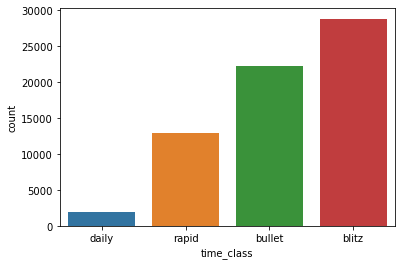

In [17]:
sns.countplot(df_chess['time_class'])

거의 대부분이 블리츠 체스를 두고 있고 그 이외에는 불렛, 래피드 입니다. 데일리의 비중은 적군요.
데일리를 제외하고 나머지 3개가 좀 양이 많으니 궁금합니다. 어떤 시간 방식을 사용할지 한번만 더 봅시다.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_control', ylabel='count'>

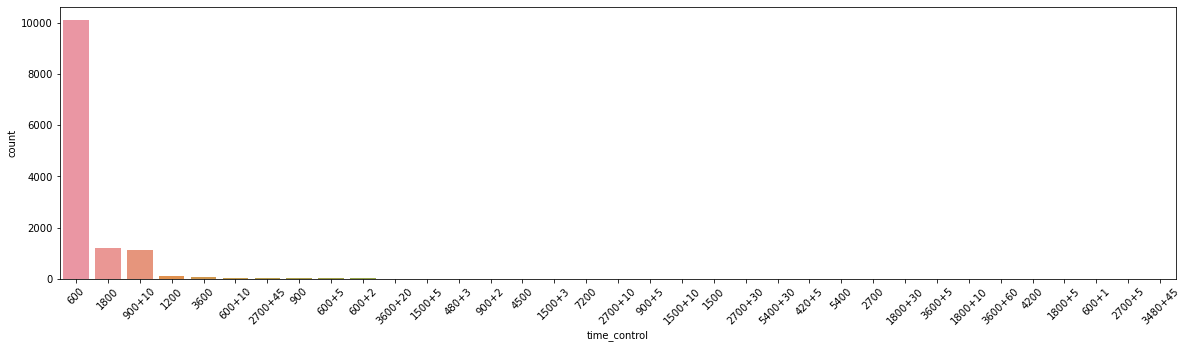

In [18]:
plt.figure(figsize=(20,5))
plt.xticks(rotation= 45)
sns.countplot(df_chess.loc[df_chess.time_class == 'rapid']['time_control'],
             order = df_chess.loc[df_chess.time_class == 'rapid']['time_control'].value_counts().index)

대부분이 600초, 10분 체스 플레이를 합니다. 그 이외에 30분이나 15분+10초 룰의 선호도가 보이고 나머지는 마이너합니다.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_control', ylabel='count'>

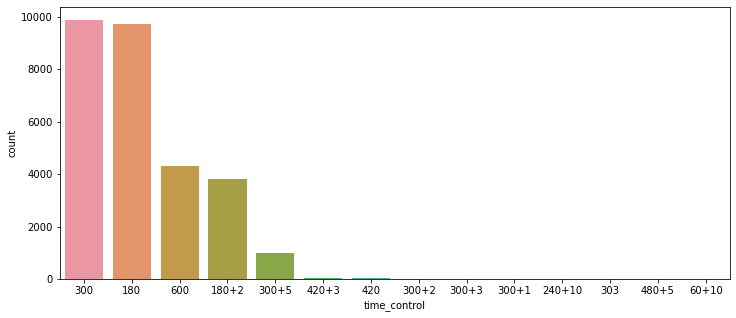

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(df_chess.loc[df_chess.time_class == 'blitz']['time_control'],
             order = df_chess.loc[df_chess.time_class == 'blitz']['time_control'].value_counts().index)

블리츠 모드에서는 5분, 3분 10분 정도를 선호하고 있고 시간이 추가되는 방식의 선호도는 낮네요.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_control', ylabel='count'>

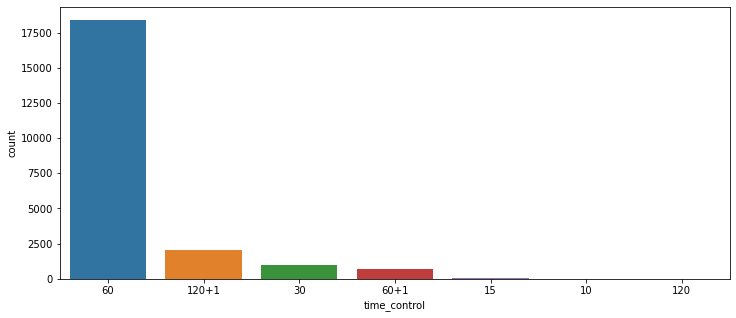

In [20]:
plt.figure(figsize=(12,5))
sns.countplot(df_chess.loc[df_chess.time_class == 'bullet']['time_control'],
             order = df_chess.loc[df_chess.time_class == 'bullet']['time_control'].value_counts().index)

불렛은 그보다 더 빠른 체스입니다. 1분 체스에 대한 선호도가 압도적입니다.

이렇게 대부분 빠른 속도의 게임에 대한 선호도가 매우 높습니다.(물론 불렛에서 30초는 좀 낮네요. 너무 빠르긴 해요)

## pgn 전처리하기

그럼 이제 체스의 수를 불러와야 합니다. 하지만 어떻게..?

In [21]:
df_chess['pgn']

0        [Event "Enjoyable games 2 - Round 1"]\n[Site "...
1        [Event "Rapid Rats - Board 5"]\n[Site "Chess.c...
2        [Event "CHESS BOARD CLASH - Round 1"]\n[Site "...
3        [Event "CHESS BOARD CLASH - Round 1"]\n[Site "...
4        [Event "CHESS BOARD CLASH - Round 1"]\n[Site "...
                               ...                        
66874    [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...
66875    [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...
66876    [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...
66877    [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...
66878    [Event "Live Chess"]\n[Site "Chess.com"]\n[Dat...
Name: pgn, Length: 65778, dtype: object

pgn이라는 것에 체스 기보가 저장되어 있습니다만. 전처리가 막막하군요

In [22]:
df_chess['pgn'][0]

'[Event "Enjoyable games 2 - Round 1"]\n[Site "Chess.com"]\n[Date "2013.01.30"]\n[Round "-"]\n[White "-Amos-"]\n[Black "miniman2804"]\n[Result "1-0"]\n[Tournament "https://www.chess.com/tournament/enjoyable-games-2"]\n[CurrentPosition "r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R b K f3 1 22"]\n[Timezone "UTC"]\n[ECO "E22"]\n[ECOUrl "https://www.chess.com/openings/Nimzo-Indian-Defense-Spielmann-Variation"]\n[UTCDate "2013.01.30"]\n[UTCTime "16:35:14"]\n[WhiteElo "1708"]\n[BlackElo "1608"]\n[TimeControl "1/259200"]\n[Termination "-Amos- won by checkmate"]\n[StartTime "16:35:14"]\n[EndDate "2013.02.01"]\n[EndTime "18:14:48"]\n[Link "https://www.chess.com/game/daily/64629816"]\n\n1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qb3 Bxc3+ 5. Qxc3 O-O 6. Bg5 c5 7. dxc5 Nc6 8. Nf3 Qa5 9. Bxf6 gxf6 10. Qxa5 Nxa5 11. e3 Rd8 12. Rd1 Kg7 13. Be2 b6 14. Rd4 bxc5 15. Rg4+ Kh6 16. Bd3 f5 17. Rh4+ Kg6 18. g4 Ba6 19. gxf5+ exf5 20. Ne5+ Kf6 21. Rh6+ Kxe5 22. f4# 1-0\n'

다행스럽게도, "\n"으로 구분을 시켜서 볼 수 있을 것 같습니다.

In [23]:
list(df_chess['pgn'][66874].split('\n'))

['[Event "Live Chess"]',
 '[Site "Chess.com"]',
 '[Date "2021.02.19"]',
 '[Round "-"]',
 '[White "Alyushkov"]',
 '[Black "abdullahnasib"]',
 '[Result "0-1"]',
 '[CurrentPosition "1k1q1bnr/p1pb2pp/Bp2p3/3pPp2/3P4/N1P2N2/1P3PPP/n4RK1 w - -"]',
 '[Timezone "UTC"]',
 '[ECO "C02"]',
 '[ECOUrl "https://www.chess.com/openings/French-Defense-Advance-Variation"]',
 '[UTCDate "2021.02.19"]',
 '[UTCTime "15:21:47"]',
 '[WhiteElo "866"]',
 '[BlackElo "901"]',
 '[TimeControl "300"]',
 '[Termination "abdullahnasib won by resignation"]',
 '[StartTime "15:21:47"]',
 '[EndDate "2021.02.19"]',
 '[EndTime "15:24:10"]',
 '[Link "https://www.chess.com/game/live/7486996141"]',
 '',
 '1. e4 {[%clk 0:05:00]} 1... e6 {[%clk 0:04:56.8]} 2. d4 {[%clk 0:04:58.2]} 2... d5 {[%clk 0:04:55.8]} 3. e5 {[%clk 0:04:56.2]} 3... f5 {[%clk 0:04:53.1]} 4. Nf3 {[%clk 0:04:37]} 4... Nc6 {[%clk 0:04:51.2]} 5. c3 {[%clk 0:04:34.2]} 5... Bd7 {[%clk 0:04:45.4]} 6. Qb3 {[%clk 0:04:30.1]} 6... b6 {[%clk 0:04:38.6]} 7. a4 {[%clk 0:04

이렇게 깔끔하게 경기의 정보를 볼 수 있습니다. 오프닝에 대한 정보도 있는데, ECO는 체스 오프닝 사전에서 부여하는 코드입니다. 각각의 이름이 존재합니다. 물론 Variations들이 많아서 이후의 수도 중요하지만 큰 줄기의 이름을 알아낼 수 있습니다.

즉, 가져와야할 정보는 다음과 같습니다.
- 두 플레이어가 둔 수 리스트
- eco 가져오기

## 전처리

그럼 세부 분석을 위한 전처리 작업을 진행하겠습니다.

In [24]:
df_chess['white_grade'] = df_chess.white_rating.apply(lambda x : get_chess_grade(x))
df_chess['black_grade'] = df_chess.black_rating.apply(lambda x : get_chess_grade(x))

In [25]:
df_chess

,white_rating,black_rating,white_result,time_class,time_control,pgn,white_grade,black_grade
0,1708,1608,win,daily,1/259200,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""...",7,6
1,1726,1577,win,daily,1/172800,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c...",7,6
2,1727,842,win,daily,1/172800,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",7,2
3,819,1727,checkmated,daily,1/172800,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",2,7
4,1729,1116,win,daily,1/172800,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",7,4
...,...,...,...,...,...,...,...,...
66874,866,901,resigned,blitz,300,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",2,3
66875,910,912,win,blitz,300,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",3,3
66876,909,919,abandoned,blitz,300,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",3,3
66877,928,933,win,blitz,300,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",3,3


문제는 태그의 위치를 모르므로 좀 고생스럽지만 오프닝을 직접 찾아줍시다.

In [26]:
def get_opening_code(x):
    for c in list(x.split('\n')):
        if c[1:5] == 'ECO ': return c[-5:-2]
    else: return 0

In [27]:
# 라이브체스일 때와, 아닐때 담기는 오프닝 위치가 달라집니다.
df_chess['opening'] = df_chess.pgn.apply(lambda x: get_opening_code(x))
df_chess['play_record'] = df_chess.pgn.apply(lambda x: list(x.split('\n'))[-2])

In [28]:
df_chess.opening.unique()

array(['E22', 'C53', 'D00', 'B20', 'A40', 'C02', 0, 'A15', 'A04', 'A57',
       'B21', 'B40', 'D35', 'D10', 'E00', 'E61', 'D30', 'B23', 'B44',
       'E62', 'A17', 'A41', 'D04', 'D02', 'A45', 'B30', 'C50', 'D06',
       'B22', 'E11', 'E60', 'E90', 'E20', 'B33', 'A44', 'C36', 'C78',
       'B00', 'D20', 'A09', 'A43', 'C00', 'D50', 'D31', 'B24', 'E71',
       'B06', 'A42', 'A10', 'D07', 'D86', 'D08', 'A60', 'A06', 'D55',
       'A85', 'A52', 'C35', 'B27', 'D43', 'B92', 'B01', 'B07', 'B34',
       'C34', 'C30', 'A84', 'C41', 'C23', 'C20', 'A01', 'B10', 'B02',
       'A00', 'C40', 'A20', 'B50', 'A53', 'A80', 'C24', 'A46', 'C01',
       'A16', 'D03', 'C25', 'A48', 'C47', 'C62', 'C68', 'C55', 'C44',
       'C21', 'C22', 'C45', 'B32', 'C26', 'B54', 'C42', 'D37', 'B53',
       'A05', 'C43', 'A28', 'A02', 'C46', 'B46', 'B12', 'C15', 'D01',
       'C64', 'A13', 'A21', 'A22', 'D15', 'E27', 'B43', 'A50', 'E87',
       'E76', 'E70', 'B28', 'D85', 'B70', 'C28', 'C33', 'A03', 'C60',
       'C05', 'C1

오프닝을 모르는 결과가 있습니다. 우째야할까요. 분류가 안되는 특이케이스인 것일거니 unknown으로 처리해줍시다.

이제 문제의 play_record인데 정리가 만만치 않습니다.

In [29]:
df_chess.play_record

0        1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qb3 Bxc3+ 5. ...
1        1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. c3 a6 5. d4 ...
2        1. d4 d5 2. e3 c6 3. c4 dxc4 4. Bxc4 b5 5. Bb3...
3        1. e4 c5 2. b3 Nc6 3. a4 d6 4. Bb5 Bd7 5. Qf3 ...
4        1. d4 e6 2. c4 Qf6 3. Nf3 d6 4. Bg5 Qg6 5. Nc3...
                               ...                        
66874    1. e4 {[%clk 0:05:00]} 1... e6 {[%clk 0:04:56....
66875    1. e4 {[%clk 0:04:59.6]} 1... e5 {[%clk 0:04:5...
66876    1. e4 {[%clk 0:05:00]} 1... e5 {[%clk 0:04:58....
66877    1. e4 {[%clk 0:04:57]} 1... c5 {[%clk 0:04:58....
66878    1. e4 {[%clk 0:05:00]} 1... e5 {[%clk 0:04:56....
Name: play_record, Length: 65778, dtype: object

역시 여러 패턴이 보이는데 0번과 66878번의 패턴을 봅시다

In [30]:
df_chess.play_record[0]

'1. d4 Nf6 2. c4 e6 3. Nc3 Bb4 4. Qb3 Bxc3+ 5. Qxc3 O-O 6. Bg5 c5 7. dxc5 Nc6 8. Nf3 Qa5 9. Bxf6 gxf6 10. Qxa5 Nxa5 11. e3 Rd8 12. Rd1 Kg7 13. Be2 b6 14. Rd4 bxc5 15. Rg4+ Kh6 16. Bd3 f5 17. Rh4+ Kg6 18. g4 Ba6 19. gxf5+ exf5 20. Ne5+ Kf6 21. Rh6+ Kxe5 22. f4# 1-0'

In [31]:
df_chess.play_record[66878]

'1. e4 {[%clk 0:05:00]} 1... e5 {[%clk 0:04:56.3]} 2. f4 {[%clk 0:04:58.6]} 2... d6 {[%clk 0:04:55.3]} 3. fxe5 {[%clk 0:04:55.3]} 3... dxe5 {[%clk 0:04:53.4]} 4. Nf3 {[%clk 0:04:54.7]} 4... Bd6 {[%clk 0:04:48.6]} 5. d4 {[%clk 0:04:48.4]} 5... c5 {[%clk 0:04:47.9]} 6. dxe5 {[%clk 0:04:45.6]} 6... Bc7 {[%clk 0:04:43.4]} 7. Bc4 {[%clk 0:04:42.7]} 7... Qxd1+ {[%clk 0:04:40.7]} 8. Kxd1 {[%clk 0:04:40.3]} 8... Ne7 {[%clk 0:04:35.4]} 9. Be3 {[%clk 0:04:38.6]} 9... O-O {[%clk 0:04:33.2]} 10. Bxc5 {[%clk 0:04:35.1]} 10... Rd8+ {[%clk 0:04:22.5]} 11. Nbd2 {[%clk 0:04:27.3]} 11... Nec6 {[%clk 0:04:14.7]} 12. Ke2 {[%clk 0:04:18.6]} 12... Bg4 {[%clk 0:04:09.4]} 13. h3 {[%clk 0:04:13.8]} 13... Bxf3+ {[%clk 0:04:07.2]} 14. gxf3 {[%clk 0:04:12.4]} 14... Nxe5 {[%clk 0:04:06.4]} 15. Bb3 {[%clk 0:04:04.4]} 15... b6 {[%clk 0:04:03.2]} 16. Be3 {[%clk 0:04:00.2]} 16... Nbc6 {[%clk 0:03:58]} 17. Nc4 {[%clk 0:03:47.5]} 17... Nxc4 {[%clk 0:03:55.2]} 18. Bxc4 {[%clk 0:03:46.2]} 18... Na5 {[%clk 0:03:51.4]} 19. 

체스 기보법에 대해 좀 알아야 하는데, 특정 말을 옮기는 좌표를 표기한 겁니다.
- (말)(상황)(좌표)가 기본입니다.
- 폰의 움직임은 폰이라고 말을 적지 않습니다. 생략합니다.
- 좌표는 도착점입니다.
- 말을 잡을 경우 x가 상황에 들어갑니다.
- 체크를 걸 경우, 맨 끝에 +가 들어갑니다.
- 프로모션 성공시 맨 끝에 = 와 승급한 말 대상이 들어갑니다.
- 킹사이드 캐슬링은 O-O, 퀸사이드 캐슬링은 O-O-O가 들어갑니다.
- 체크메이트를 했을 경우 맨 끝에 #가 들어갑니다.

그 외 뭐 다양한 상황이 있는데 공통점은 :나 .나 -은 쓰이지 않습니다.
이를 기반으로 전처리를 만들어보죠

In [32]:
def get_seq(x):
    seq_list = []
    for c in list(x.split(' ')):
        if len(c) > 0 and ('.' not in c) and (':' not in c) and ('%' not in c):
            seq_list.append(c)
    return seq_list

In [33]:
df_chess['play_record'] = df_chess.play_record.apply(lambda x: get_seq(x))

이렇게 모든 수를 담을 수 있습니다. 마지막으로 오프닝 시트를 불러와서 merge 하고 없는 것은 Unknown 처리 합시다

In [34]:
df_opening = pd.read_csv('C:/Users/USER/Desktop/playground/chess_play/chess_opening_eco_code.csv')

In [35]:
df_opening.columns = ['opening', 'opening_name', 'formal_opening_moves']
df_chess = pd.merge(df_chess, df_opening, on = 'opening', how = 'left')

In [36]:
df_chess['opening_name'] = df_chess['opening_name'].apply(lambda x: 'unknown' if x !=x else x)
df_chess['formal_opening_moves'] = df_chess['formal_opening_moves'].apply(lambda x: 'unknown' if x !=x else x)

오프닝 코드가 없어서 결측치가 될 것 까지 모두 unknown으로 처리하였다.

## 수 분석하기? 이젠?

### 첫 수는?

d4가 세냐, e4가 세냐 뭐가 대세냐 다른 요상한 오프닝도 좋다 등 유구한 체스계의 떡밥입니다.
데이터로 한번 봅시다.

In [37]:
df_chess['first_move'] = df_chess['play_record'].apply(lambda x: x[0])

In [38]:
df_chess.first_move.unique()

array(['d4', 'e4', '0-1', 'Nf3', 'c4', 'b3', 'g3', 'e3', 'f3', 'Nh3',
       'Bf4', 'Ke2', 'a4', 'd3', 'a3', 'b4', 'f4', 'h4', 'Nc3', 'c3',
       'g4', 'h3', '1-0', 'Bg5', 'Be2', 'exd5', 'Be3', 'd5', 'Na3',
       'Qh4+', 'Bf5', 'e5', 'Nf6', 'c6', '1/2-1/2', 'Rg1', 'Ng5', 'O-O',
       'Bd2', 'O-O-O', 'e6', 'Bd3', 'b6', 'Bxb4', 'Bb6', 'Bd6', 'Nc6',
       'Qe7', 'c5', 'Qe5+', 'Ne4', 'Bc4', 'Bg7', 'exd4', 'Nd4', 'Bxc3+',
       'f5', 'g6', 'a6', 'Ne2', 'Nd2', 'Bb4+', 'Be7', 'dxe4', 'dxe5',
       'Bb4', 'exf4', 'Qc1', 'dxc5', 'cxd5', 'Nfe3', 'Nbc3', 'Bg4', 'Kf2',
       'Ncd4', 'Nac3', 'Nhg3', 'dxc3', 'Bg6', 'Nxc6', 'Ke1', 'Bc5'],
      dtype=object)

### Warning! 무언가 이상합니다.

엥, 첫 수가 될 수 없는 것이 보입니다. 뭐가 문제일까요?

체스의 첫 수는 20개만 가능합니다. 그게 아닌 것들은 오류라기 보단는 이벤트 매치입니다. 예를 들어 정규 룰이나 특정 포지션에서 시작하거나 엔드게임만 대결하는 그런 이벤트들이 있습니다. 따라서 체스 첫 수로 가능한 20개만 해당 목록에 넣겠습니다.

In [39]:
first_move_list = ['f3', 'a4', 'h4', 'h3', 'Na3', 'Nh3', 'a3', 'c3', 'e3', 'd3', 'g4',
                  'f4', 'Nc3', 'b4', 'b3', 'g3', 'c4', 'Nf3', 'e4', 'd4']

In [40]:
len(first_move_list)

20

In [41]:
df_condi = df_chess.first_move.apply(lambda x: True if x in first_move_list else False)
df_chess = df_chess.loc[df_condi]

In [42]:
df_chess.first_move.unique()

array(['d4', 'e4', 'Nf3', 'c4', 'b3', 'g3', 'e3', 'f3', 'Nh3', 'a4', 'd3',
       'a3', 'b4', 'f4', 'h4', 'Nc3', 'c3', 'g4', 'h3', 'Na3'],
      dtype=object)

우선 규칙상 말이 되는 20개의 수만이 남았습니다. 

## 다시 첫 수 보기

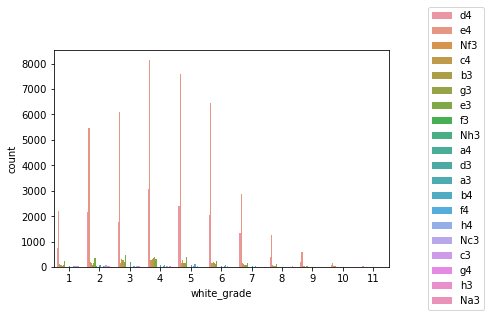

In [43]:
sns.countplot(x = 'white_grade', hue = 'first_move', data = df_chess)
plt.legend(loc = 'center right', bbox_to_anchor=(1.3, 0.5))
plt.show()

막대그래프로 보니까 좋지 않습니다. 그리고 비율로 봐도 20개면_어려울 것 같습니다. 체스 지식이 좀 필요한 순간입니다.

### e4 vs d4, 유구한 떡밥

유규한 떡밥부터 풀어보겠습니다. 가장 베스트 2개인 e4와 d4만의 선호도를 비교합니다.

In [44]:
df_e4d4_condi = df_chess.first_move.apply(lambda x: True if x in ['e4', 'd4'] else False)
df_e4d4 = df_chess.loc[df_e4d4_condi]

e4, d4의 비율은 각 백의 레이팅 등급에 따라 얼마나 다를까? 

<AxesSubplot:xlabel='white_grade', ylabel='count'>

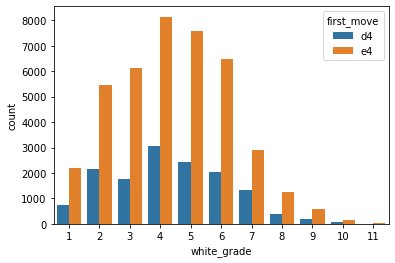

In [45]:
sns.countplot(data = df_e4d4, x = "white_grade", hue = 'first_move')

이를 비율로 변경해서 그릴 수는 없을까? 각 그룹별로 e4와 d4의 비율 차이를 그래프로 그려보자

In [46]:
df_e4d4_bygrade = pd.crosstab(index = df_e4d4['white_grade'], columns = df_e4d4['first_move'])
df_e4d4_bygrade = df_e4d4_bygrade.reset_index(drop = False)
df_e4d4_bygrade['sum'] = df_e4d4_bygrade['d4'] + df_e4d4_bygrade['e4']
df_e4d4_bygrade['d4_ratio'] = df_e4d4_bygrade['d4'] / df_e4d4_bygrade['sum']
df_e4d4_bygrade['e4_ratio'] = df_e4d4_bygrade['e4'] / df_e4d4_bygrade['sum']

In [47]:
df_e4d4_bygrade

first_move,white_grade,d4,e4,sum,d4_ratio,e4_ratio
0,1,759,2213,2972,0.255384,0.744616
1,2,2164,5455,7619,0.284027,0.715973
2,3,1779,6111,7890,0.225475,0.774525
3,4,3057,8143,11200,0.272946,0.727054
4,5,2416,7592,10008,0.241407,0.758593
5,6,2058,6465,8523,0.241464,0.758536
6,7,1328,2886,4214,0.315140,0.684860
7,8,380,1241,1621,0.234423,0.765577
8,9,201,585,786,0.255725,0.744275
9,10,89,156,245,0.363265,0.636735


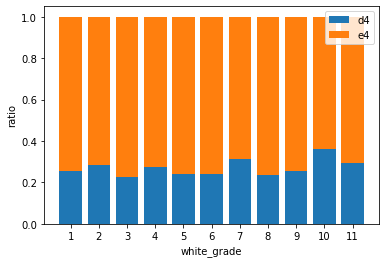

In [48]:
p1 = plt.bar(x = df_e4d4_bygrade['white_grade'], height = df_e4d4_bygrade['d4_ratio'])
p2 = plt.bar(x = df_e4d4_bygrade['white_grade'], height = df_e4d4_bygrade['e4_ratio'], bottom = df_e4d4_bygrade['d4_ratio'])
plt.xticks(df_e4d4_bygrade['white_grade'], (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))
plt.xlabel('white_grade')
plt.ylabel('ratio')
plt.legend(('d4', 'e4'))
plt.show()

- 레이팅에 따라서 d4, e4의 선택 비율이 크게 달라 보이지는 않습니다.

### 나머지 첫 수에 대해서도 분석?

In [49]:
df_chess

,white_rating,black_rating,white_result,time_class,time_control,pgn,white_grade,black_grade,opening,play_record,opening_name,formal_opening_moves,first_move
0,1708,1608,win,daily,1/259200,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""...",7,6,E22,"[d4, Nf6, c4, e6, Nc3, Bb4, Qb3, Bxc3+, Qxc3, ...","Nimzo-Indian, Spielmann Variation",1 d4 Nf6 2 c4 e6 3 Nc3 Bb4 4 Qb3,d4
1,1726,1577,win,daily,1/172800,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c...",7,6,C53,"[e4, e5, Nf3, Nc6, Bc4, Bc5, c3, a6, d4, exd4,...",Giuoco Piano,1 e4 e5 2 Nf3 Nc6 3 Bc4 Bc5 4 c3,e4
2,1727,842,win,daily,1/172800,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",7,2,D00,"[d4, d5, e3, c6, c4, dxc4, Bxc4, b5, Bb3, a5, ...",Queen's Pawn Game,1 d4 d5,d4
3,819,1727,checkmated,daily,1/172800,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",2,7,B20,"[e4, c5, b3, Nc6, a4, d6, Bb5, Bd7, Qf3, Nd4, ...",Sicilian,1 e4 c5,e4
4,1729,1116,win,daily,1/172800,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",7,4,A40,"[d4, e6, c4, Qf6, Nf3, d6, Bg5, Qg6, Nc3, c6, ...",Queen's Pawn Game,1 d4,d4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65773,866,901,resigned,blitz,300,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",2,3,C02,"[e4, e6, d4, d5, e5, f5, Nf3, Nc6, c3, Bd7, Qb...","French, Advance",1 e4 e6 2 d4 d5 3 e5,e4
65774,910,912,win,blitz,300,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",3,3,C20,"[e4, e5, c4, Nc6, d3, Nf6, g3, d6, Nh3, Bg4, B...",King's Pawn Game,1 e4 e5,e4
65775,909,919,abandoned,blitz,300,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",3,3,C41,"[e4, e5, Nf3, d6, Bc4, c5, Ng5, Qxg5, O-O, Bh3...",Philidor Defense,1 e4 e5 2 Nf3 d6,e4
65776,928,933,win,blitz,300,"[Event ""Live Chess""]\n[Site ""Chess.com""]\n[Dat...",3,3,B20,"[e4, c5, d3, Nc6, c4, e5, Nc3, Nf6, g3, d6, Nh...",Sicilian,1 e4 c5,e4


우선 오프닝 중에서도 유의미한 수의 목록은 e4, d4, Nf3, c4, g3 정도이고 나머지는 싹 다 기타로 봐도 무방하다.
물론, 정말 특이한 오프닝들도 있지만 정말 특이한거고 아예 안되거나 정말 최악의 수들은 etc로 보는게 현명할 것이다.
그리고 초보들은 이상한거 쓰는것도 비권장 되기에 etc로 두는 것이 맞다.

In [50]:
valid_set = ['e4', 'd4', 'Nf3', 'c4', 'g3']
df_chess_first = df_chess.copy()
df_chess_first['first_move_gp'] = df_chess_first.first_move.apply(lambda x: x if x in valid_set else 'etc')
df_chess_first = df_chess_first[['white_grade', 'first_move']]

In [51]:
df_chess_first

,white_grade,first_move
0,7,d4
1,7,e4
2,7,d4
3,2,e4
4,7,d4
...,...,...
65773,2,e4
65774,3,e4
65775,3,e4
65776,3,e4


grade별 first_move pie chart를 한번 그려보자.

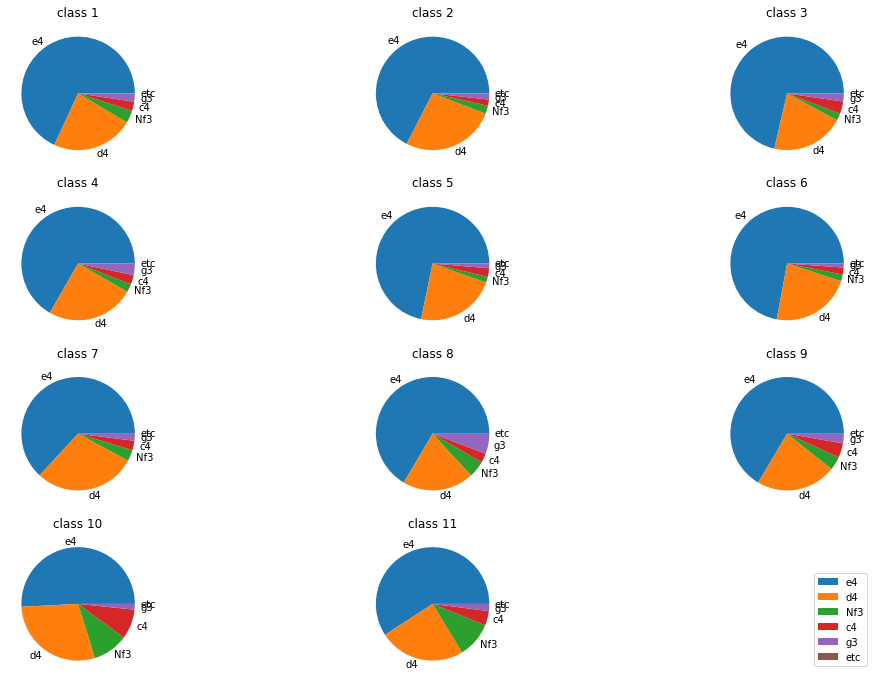

In [52]:
plt.figure(figsize = (18, 12))

valid_set = ['e4', 'd4', 'Nf3', 'c4', 'g3', 'etc']
for i in range(1, 12):
    plt.subplot(4, 3, i)
    cur_df = df_chess_first.loc[df_chess_first.white_grade == i]
    size_list = []
    for v in valid_set:
        count = 0
        for f in list(cur_df.first_move):
            if v == f: count += 1
        size_list.append(count)
    size_list = [x / len(cur_df) * 100 for x in size_list]
    plt.pie(size_list, labels = valid_set)
    plt.title('class %d' % i)
plt.legend(('e4', 'd4', 'Nf3', 'c4', 'g3', 'etc'),
           loc = 'upper right', bbox_to_anchor=(3.6, 0.75))
plt.show()

- 전체 비율로 확인 결과, 높은 클래스로 갈수록 d4 비중이 조금은 늘어나며, 특히 Nf3 사용 비중이 늘어나는 것으로 보인다.

## 오프닝 통계

이제는 오프닝의 통계를 내려보자. 오프닝의 종류가 너무 많으므로 상위 20개만 하자.

<AxesSubplot:xlabel='count', ylabel='opening_name'>

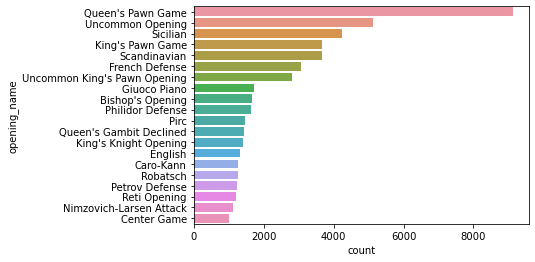

In [53]:
sns.countplot(y=df_chess['opening_name'], order = df_chess['opening_name'].value_counts().index[0:20])

역시 이것도 레이팅마다 다른지 보고 싶다. 너무 많아서 10개만 보겠습니다

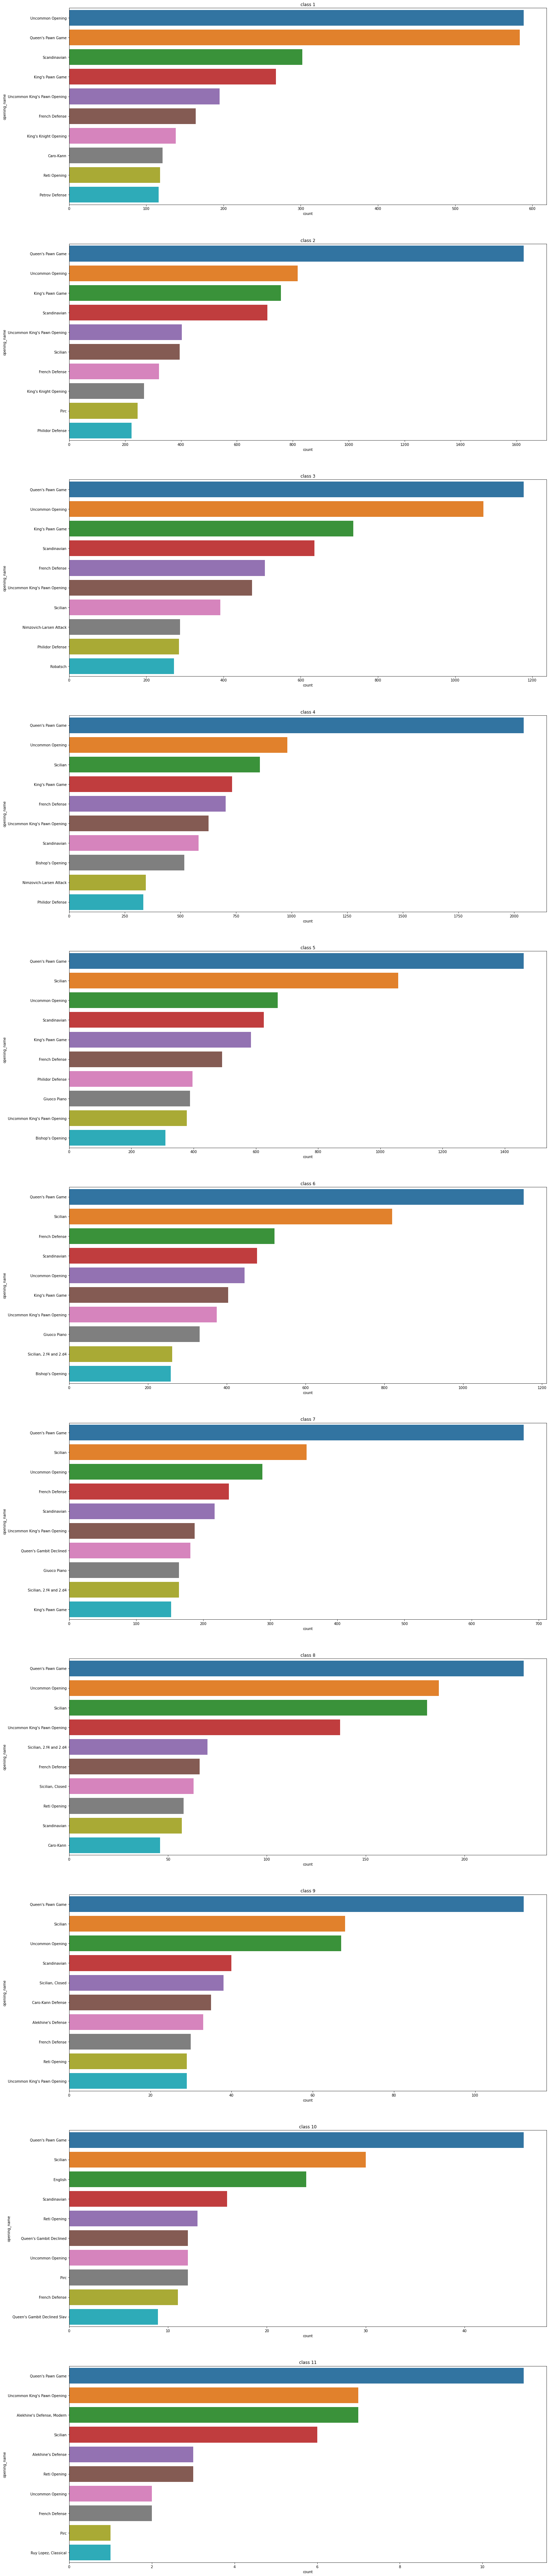

In [54]:
plt.figure(figsize = (24, 144))

for i in range(1, 12):
    plt.subplot(12, 1, i)
    cur_df = df_chess.loc[df_chess.white_grade == i]
    sns.countplot(y=cur_df['opening_name'], order = cur_df['opening_name'].value_counts().index[0:10])
    plt.title('class %d' % i)
    
plt.show()

레이팅에 따라서 선호하는 opening이 확연히 달라진다.
- 특히 class 1의 경우는, 오프닝 개념도 약할거라 Uncommon의 비중이 가장 높다.
- 일정 클래스 이상부터는 시실리안 오프닝이나 프렌치 디펜스 등의 비중이 늘어난다.
  - 이는 그 시점부터는 새로운 오프닝을 많이 배우기 때문이다.
- 그러나 최상위 클래스에서는 시실리안 오프닝의 비중이 줄고 알래칸 등의 오프닝 선호도가 높다.

### 모드마다는 다를까

시간제한에 따라서 선호 오프닝이 달라질지 궁금하다. 블리츠, 불렛, 래피드, 데일리 총 4가지였으므로 이것에 따라 나누자.

In [55]:
df_chess.time_class.unique()

array(['daily', 'rapid', 'bullet', 'blitz'], dtype=object)

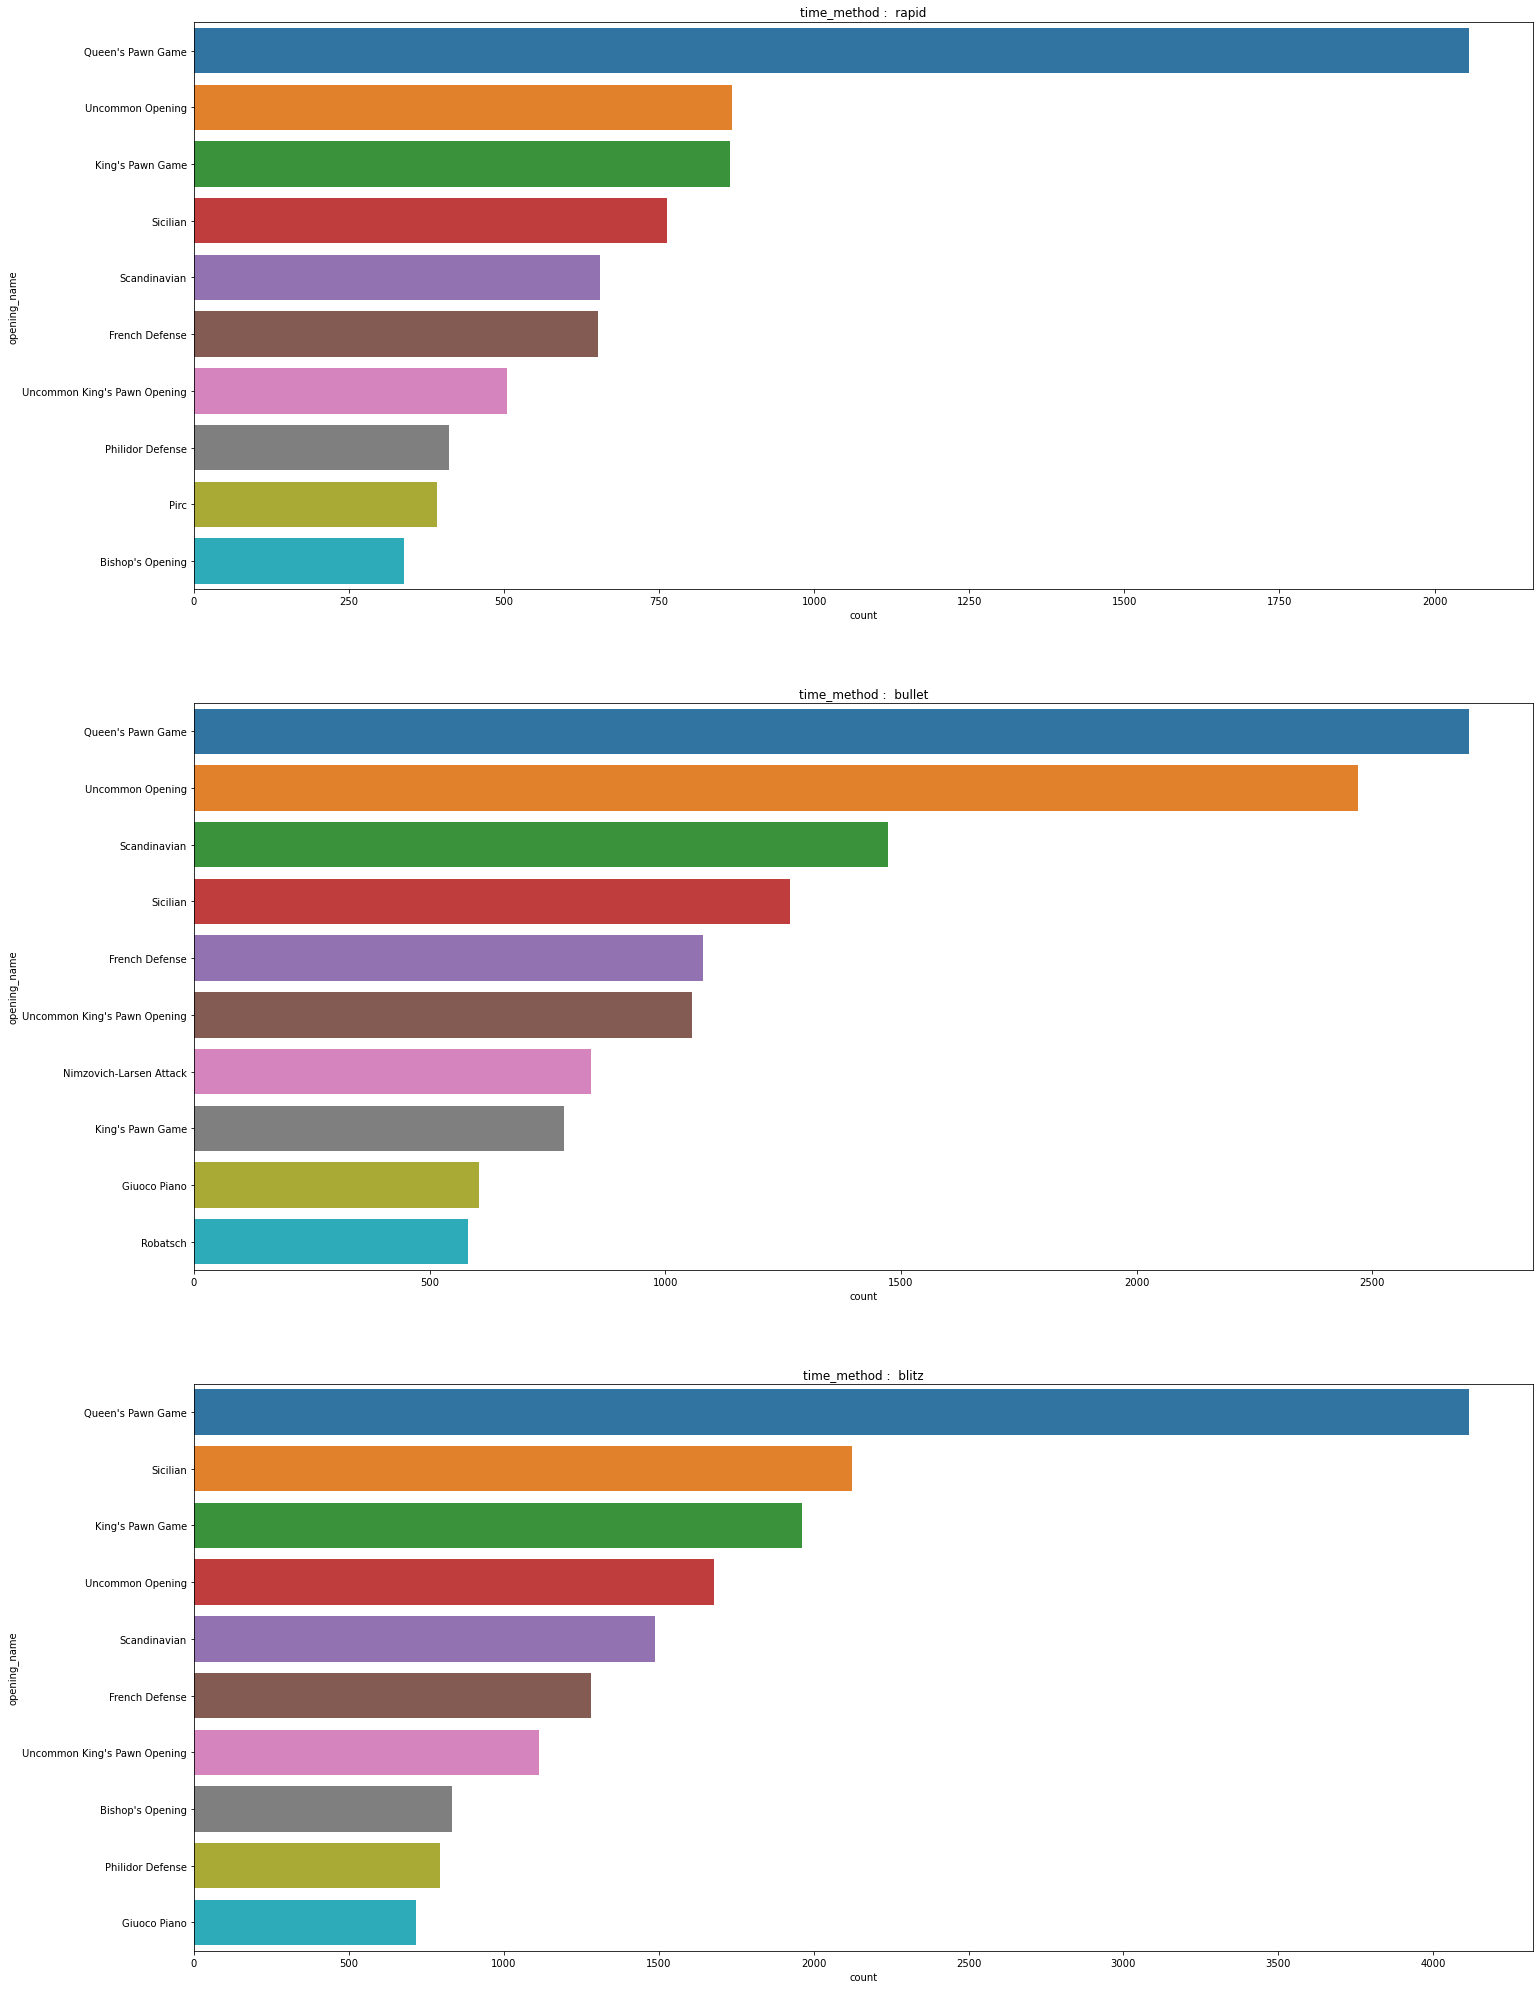

In [56]:
plt.figure(figsize = (24, 48))
time_list = ['daily', 'rapid', 'bullet', 'blitz']
for i in range(1, 4):
    plt.subplot(4, 1, i)
    cur_df = df_chess.loc[df_chess.time_class == time_list[i]]
    sns.countplot(y=cur_df['opening_name'], order = cur_df['opening_name'].value_counts().index[0:10])
    plt.title('time_method :  %s' % time_list[i])
    
plt.show()

첫 수 제약 등의 과정에서, 데일리의 지표는 빠진 것으로 추정됩니다. 

### 조금만 더, 오프닝 살펴보기

레이팅이 비슷하거나 같을 때 이것을 살펴보는 것이 유용할 것이다. 차이가 클 때는, 다를 수 있으니까

In [57]:
df_chess_sim_condi = df_chess.apply(lambda x: True if abs(x['white_grade'] - x['black_grade'])<= 1 else False, axis = 1)
df_chess_sim = df_chess.loc[df_chess_sim_condi]

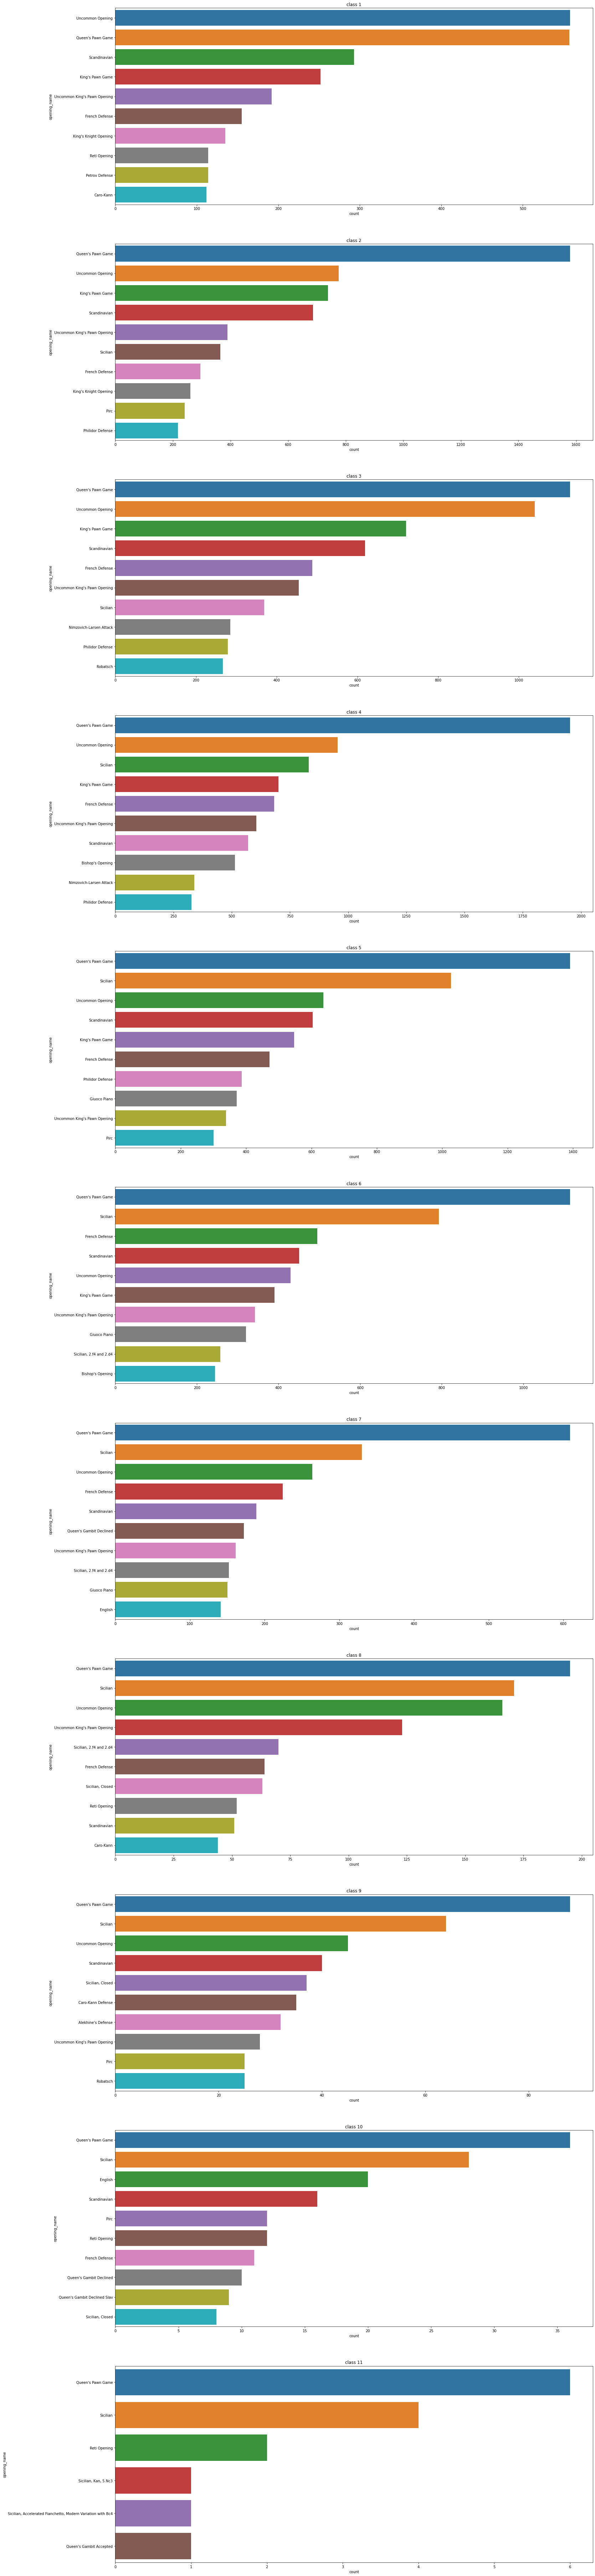

In [58]:
plt.figure(figsize = (24, 144))

for i in range(1, 12):
    plt.subplot(12, 1, i)
    cur_df = df_chess_sim.loc[df_chess_sim.white_grade == i]
    sns.countplot(y=cur_df['opening_name'], order = cur_df['opening_name'].value_counts().index[0:10])
    plt.title('class %d' % i)
    
plt.show()

전체와는 조금 더 다른 구성이 눈에 들어온다

## 그래서 오프닝도 알겠고, 뭐 근데 어쩌라고?

티어마다 다르지만, 특정 오프닝을 사용하다고 티어가 뭐다 라고 말하기는 좀 어렵다. 왜냐면 오프닝 - 미들게임 - 엔드게임의 구조로 가는 체스에서, 오프닝만 보고 그 레이팅을 예측하기는 어렵다. 레이팅에 따라서 그 오프닝의 숙련도도 다를거고, 유의미한 수를 잘 내는지 등도 갈릴 것이다.

## 너의 레이팅이 보여

이제 또다른 본 문제인 레이팅 예측을 풀어보자. 정확히는 수를 보고, 흑의 결과와 백의 결과를 맞혀야 한다.

In [59]:
df_chess.head(5)

,white_rating,black_rating,white_result,time_class,time_control,pgn,white_grade,black_grade,opening,play_record,opening_name,formal_opening_moves,first_move
0,1708,1608,win,daily,1/259200,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""...",7,6,E22,"[d4, Nf6, c4, e6, Nc3, Bb4, Qb3, Bxc3+, Qxc3, ...","Nimzo-Indian, Spielmann Variation",1 d4 Nf6 2 c4 e6 3 Nc3 Bb4 4 Qb3,d4
1,1726,1577,win,daily,1/172800,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c...",7,6,C53,"[e4, e5, Nf3, Nc6, Bc4, Bc5, c3, a6, d4, exd4,...",Giuoco Piano,1 e4 e5 2 Nf3 Nc6 3 Bc4 Bc5 4 c3,e4
2,1727,842,win,daily,1/172800,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",7,2,D00,"[d4, d5, e3, c6, c4, dxc4, Bxc4, b5, Bb3, a5, ...",Queen's Pawn Game,1 d4 d5,d4
3,819,1727,checkmated,daily,1/172800,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",2,7,B20,"[e4, c5, b3, Nc6, a4, d6, Bb5, Bd7, Qf3, Nd4, ...",Sicilian,1 e4 c5,e4
4,1729,1116,win,daily,1/172800,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",7,4,A40,"[d4, e6, c4, Qf6, Nf3, d6, Bg5, Qg6, Nc3, c6, ...",Queen's Pawn Game,1 d4,d4


우선, 좀 필요한 정보만 가져오자.
- target은 백-흑의 rating 등급이다. 수치를 맞히는 것은 오바고, 등급만 맞혀도 된다.
  * 무려 target 변수 종류가 121가지이다. 쉽지 않다.
- 체스 경기 로그
- time_class, time_control
  * 시간에 따라서 레이팅이 달라진다. 따라서 이것도 일단 고려 대상이다.
  * 당연히 생각시간이 길수록, 더 좋은 퍼포먼스를 낼 것이니까.
  
그 외 오프닝 이름은 필요 없다. 왜냐면 첫 몇수만 보면 그 오프닝이 나오고, 사실 특정 오프닝이 어떤 등급을 말해주는 경향성은 시각화로 보이지 않아 굳이 필요하지 않다.

In [60]:
df_chess_rate = df_chess[['play_record', 'time_class', 'time_control', 'white_grade', 'black_grade']]

In [61]:
df_chess_rate

,play_record,time_class,time_control,white_grade,black_grade
0,"[d4, Nf6, c4, e6, Nc3, Bb4, Qb3, Bxc3+, Qxc3, ...",daily,1/259200,7,6
1,"[e4, e5, Nf3, Nc6, Bc4, Bc5, c3, a6, d4, exd4,...",daily,1/172800,7,6
2,"[d4, d5, e3, c6, c4, dxc4, Bxc4, b5, Bb3, a5, ...",daily,1/172800,7,2
3,"[e4, c5, b3, Nc6, a4, d6, Bb5, Bd7, Qf3, Nd4, ...",daily,1/172800,2,7
4,"[d4, e6, c4, Qf6, Nf3, d6, Bg5, Qg6, Nc3, c6, ...",daily,1/172800,7,4
...,...,...,...,...,...
65773,"[e4, e6, d4, d5, e5, f5, Nf3, Nc6, c3, Bd7, Qb...",blitz,300,2,3
65774,"[e4, e5, c4, Nc6, d3, Nf6, g3, d6, Nh3, Bg4, B...",blitz,300,3,3
65775,"[e4, e5, Nf3, d6, Bc4, c5, Ng5, Qxg5, O-O, Bh3...",blitz,300,3,3
65776,"[e4, c5, d3, Nc6, c4, e5, Nc3, Nf6, g3, d6, Nh...",blitz,300,3,3


전체 수를 다 보고 레이팅을 맞추는 것은 비효율적일것이기도 하고, 판 수마다 다를 것이다. 따라서 길이를 봐야 하는데

<AxesSubplot:xlabel='count_turn', ylabel='Count'>

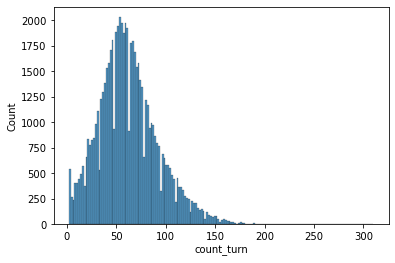

In [62]:
df_chess['count_turn'] = df_chess.play_record.apply(lambda x: len(x))
sns.histplot(df_chess['count_turn'])

엔드 게임의 진행에 따라 수가 많아질수도 있는데 50수 근처가 가장 많이 분포하고 있다. 따라서 그것보다 약간 많은 수에서 끊어서, 그 수 까지만 보고 레이팅을 판별하는 것으로 하자.
- 어차피 일정 미들게임 정도까지만 보면 수 판별이 유의미하다.
  - 흑백 번걸아가며 30수 정도 가까이 두면, 충분한 진행이 되었다고 판단할 수 있다.
  - 여기서는 각 수를 따로 담았으므로 60수~70수 정도 까지만 관측하면 된다.
- 실제 엔드게임은 일정 수순으로 진행되는 경우도 많고, 특정 엔드게임을 몰라서 패배하거나 알아서 이기는 등의 상황들도 다수 존재하다.
- 일정 미들게임까지가 자신의 파워를 나타내기에 적합하다고 판단된다.

실제 예측은 다음과 같은 식으로 진행할려고 한다.
- 유사도 기반 예측, 유사한 수를 두고 진행했으면 레이팅은 유사할 것이다.
- 따라서 체스 경기를 하나의 문장이라고 두고, 길이가 긴 경기는 엔드게임 형태이므로 반복수도 많을 거라, 일정 시점에서 자른다.
- 일찍 끝난 경기는 일찍으로 둔다

In [63]:
def get_chess_string(x):
    cur_len = len(x)
    if cur_len >= 70: return x[0:70]
    else:
        return x

df_chess_rate['chess_string'] = df_chess_rate.play_record.apply(lambda x: get_chess_string(x))

<ipython-input-63-dbe7db83cbb8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chess_rate['chess_string'] = df_chess_rate.play_record.apply(lambda x: get_chess_string(x))


또한 유사한 등급에 대한 예측이 효율적일 것이므로, 같은 등급의 데이터만 가지고 우선 예측을 진행해보자.
추가로, 모드마다 생각 시간이 다를 것이기에, 블리츠 300을 기준으로 분류를 진행해보겠습니다.

In [64]:
df_chess_rate_same = df_chess_rate.loc[df_chess_rate.white_grade == df_chess_rate.black_grade]
df_chess_rate_same_condi = df_chess_rate_same.apply(lambda x: True if x['time_class'] == 'blitz' and x['time_control'] == '300' else False, 
                                          axis = 1)
df_chess_rate_same = df_chess_rate_same[df_chess_rate_same_condi]
df_chess_rate_same = df_chess_rate_same[['chess_string', 'white_grade']]
df_chess_rate_same.columns = ['chess_string', 'grade']

11등급이 존재하지 않으나, 우선은 10개의 등급을 예측하는 모델을 짜보자. 모드나 등급을 통일하여 예측하고, 이후 모델을 확장해볼 것이다.

In [65]:
df_chess_rate_same

,chess_string,grade
221,"[e4, e6, Nf3, d5, Bb5+, c6, Bd3, Nf6, c4, dxe4...",6
223,"[e4, d5, e5, d4, c3, f6, cxd4, Qxd4, Nf3, Qe4+...",2
224,"[e4, e5, Bc4, f6, a3, Nc6, Nf3, g5, c3, d6, Ba...",2
225,"[e4, e5, g4, d5, Bg2, d4, Nf3, Nf6, d3, Nc6, B...",2
226,"[e4, e5, Bc4, Qf6, Nf3, Bc5, d3, Qb6, O-O, Qg6...",2
...,...,...
65772,"[e4, e5, d4, d6, a4, Nh6, d5, g6, Bxh6, Bxh6, ...",2
65774,"[e4, e5, c4, Nc6, d3, Nf6, g3, d6, Nh3, Bg4, B...",3
65775,"[e4, e5, Nf3, d6, Bc4, c5, Ng5, Qxg5, O-O, Bh3...",3
65776,"[e4, c5, d3, Nc6, c4, e5, Nc3, Nf6, g3, d6, Nh...",3


In [66]:
df_chess_rate_same.to_csv('C:/Users/USER/Desktop/playground/chess_play/chess_rating_pred_dataset.csv', index = None)

### simple한 문제부터, 동일 등급 동일 문제

### 시도 : CountVectorizer

시도는 CounterVectorizer을 바탕으로 진행할 것이다. 얼마나 예측이 가능할지..

In [67]:
df_chess_rate_same

,chess_string,grade
221,"[e4, e6, Nf3, d5, Bb5+, c6, Bd3, Nf6, c4, dxe4...",6
223,"[e4, d5, e5, d4, c3, f6, cxd4, Qxd4, Nf3, Qe4+...",2
224,"[e4, e5, Bc4, f6, a3, Nc6, Nf3, g5, c3, d6, Ba...",2
225,"[e4, e5, g4, d5, Bg2, d4, Nf3, Nf6, d3, Nc6, B...",2
226,"[e4, e5, Bc4, Qf6, Nf3, Bc5, d3, Qb6, O-O, Qg6...",2
...,...,...
65772,"[e4, e5, d4, d6, a4, Nh6, d5, g6, Bxh6, Bxh6, ...",2
65774,"[e4, e5, c4, Nc6, d3, Nf6, g3, d6, Nh3, Bg4, B...",3
65775,"[e4, e5, Nf3, d6, Bc4, c5, Ng5, Qxg5, O-O, Bh3...",3
65776,"[e4, c5, d3, Nc6, c4, e5, Nc3, Nf6, g3, d6, Nh...",3


In [68]:
def to_string(x):
    return_string = ''
    for i in range(len(x)):
        return_string += x[i]
        if i != len(x) - 1:
            return_string += ' '
    return return_string

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

df_chess_rate_same['chess_string'] = df_chess_rate_same['chess_string'].apply(lambda x: to_string(x))
X = df_chess_rate_same['chess_string']
y = df_chess_rate_same['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42, stratify = y)
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [70]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 7)
clf.fit(X_train_vec, y_train)
pred = clf.predict(X_test_vec)

등급은 순차가 있으므로, "오차"를 MAE로 계산하자

In [71]:
from sklearn.metrics import mean_absolute_error

def get_error(pred):
    return mean_absolute_error(pred, y_test)

get_error(pred)

1.9965004374453192

약 2등급 정도의 큰 진폭 차이를 보이고 있다. 다른 좋은 방법은 없을까?

### 맥락을 반영하다 : N-gram

사실, 특정 수에 이렇게 반응한다는 N-gram이 중요할 것이다. N-gram을 통해 다시 학습해보자.
하나의 수를 보고, 다음 수에는 어떻게 할까 이므로 2-gram 이상은 필요하다!
또한 2수 수읽기가 가능하다는 것은 나-상대-나 즉, 3개에 대한 읽기가 필요하다. 즉 2-gram이 아닌 3-gram이 필요하다.
2수, 3수 까지 보기 위해 n-gram은 3,4,5로 살펴보자 

In [72]:
vectorizer = CountVectorizer(ngram_range = (3, 5))
vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [73]:
clf = RandomForestClassifier(max_depth = 7)
clf.fit(X_train_vec, y_train)
pred = clf.predict(X_test_vec)
get_error(pred)

2.00087489063867

오잉? N-gram을 써도 잘 되지 않는다.

### Tf-idf는 먹힐까?

등장 빈도로 판단하면, 등급을 매길 수 있을까? 사실 어느 정도 각 오프닝별로 포지션은 정해져있고, 고등급일수록 포지션 싸움이 되어 중요 키워드로 많이 등장할 수도 있다. 게다가 이 경우 너무나도 뻔한 수에 대해서는 가중치를 크게 주지 않을거라, 어느정도 좋은 피쳐들을 뽑아내 볼 수 있을것이라고 기대해 볼 수 있다.

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (3, 5))
vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [75]:
clf = RandomForestClassifier(max_depth = 7)
clf.fit(X_train_vec, y_train)
pred = clf.predict(X_test_vec)
get_error(pred)

2.0043744531933507

결과가 크게 개선되지는 않는다.

### 유사도의 활용?

유사도 활용에서는 계산량이 너무 많아 3-gram만을 활용해보자

In [76]:
vectorizer = CountVectorizer(ngram_range = (3, 3))
vectorizer.fit(X_train)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [77]:
X_train_array = X_train_vec.toarray()

In [78]:
from numpy import dot
from numpy.linalg import norm
def cosine_similarity(A, B):
    return dot(A, B)/(norm(A)*norm(B))

가장 유사한 10개의 경기 결과를 보고, 이들의 평균 레이팅으로 예측해보자.

In [79]:
def get_avg_rate_with_sym(record):
    sym_dict = {}
    for i in range(len(X_train_array)):
        cur_sym = cosine_similarity(X_train_array[i], record)
        if cur_sym > 0:
            sym_dict[i] = cur_sym
    if len(sym_dict) > 0:
        sym_dict = sorted(sym_dict.items(), key = lambda item: item[1], reverse = True)
        if len(sym_dict) > 10:
            max_sim_coord = list(sym_dict)[:10]
        else:
            max_sim_coord = list(sym_dict)
        max_list = []
        for logs in max_sim_coord:
            max_list.append(logs[0])
        print('done')
        return max_list
    else:
        print('done')
        return []

In [80]:
X_test_array = X_test_vec.toarray()

In [81]:
X_test_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
def get_level_avg(result):
    sum_lev = 0
    if len(result) == 0:
        return 6
    else:
        for x in result:
            sum_lev += list(y_train)[x]
        return sum_lev/len(result)

In [83]:
result = get_avg_rate_with_sym(X_test_array[0])
print(get_level_avg(result))

<ipython-input-78-aaf86c0833b6>:4: RuntimeWarning: invalid value encountered in true_divide
  return dot(A, B)/(norm(A)*norm(B))


done
2.9


계산량이 상당히 많으므로, 맨 앞의 20개의 경기만 넣고 유사도 계산이 잘 되는지 보려고 한다.

In [84]:
level_predict = []
for i in range(20):
    result_idx = get_avg_rate_with_sym(X_test_array[i])
    result = get_level_avg(result_idx)
    level_predict.append(result)
    
y_test_20 = list(y_test)[:20]
print(mean_absolute_error(level_predict, y_test_20))

<ipython-input-78-aaf86c0833b6>:4: RuntimeWarning: invalid value encountered in true_divide
  return dot(A, B)/(norm(A)*norm(B))


done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
1.4749999999999999


어느 정도의 성능 향상은 보이나, 실제 예측 속도가 너무 느리다.

## 발전 방향

결국은 순서를 유지해서 예측해야 하는 것이 속도도 더 빠를 것입니다.